In [15]:
import pandas as pd

In [16]:
df = pd.read_csv('reviews.csv')
df


,Hotel_Code,Review created,Hotel_Brand,Language,Text,Type of trip,Your gender identity,Your age group
0,0,2023-06-30,0,en,"Well appointed lobby and comfortable stay ,no ...",business,Male,35-54
1,1,2023-06-30,1,en,Stayed because of meet the buyer.\nA bit quirk...,business,Female,65+
2,2,2023-06-30,0,en,There was no service at the bar on the ground ...,business,Male,65+
3,3,2023-06-28,2,en,We stayed for the weekend. Arrived Saturday le...,couple,Female,35-54
4,4,2023-06-28,2,en,Customer service amazing no job to big .Always...,family,Male,35-54
...,...,...,...,...,...,...,...,...
47736,376,2023-05-22,8,en,Door doesn't work. It's locks you insider . G...,business,Male,35-54
47737,387,2023-05-21,0,en,1 night. Comfy beds,family,Female,55-64
47738,2534,2023-05-21,0,fr,J’avais précisé une chambre au calme en bout d...,family,Male,35-54
47739,381,2023-05-21,10,fr,Toilette très petit je parle du toilette pas l...,friends,Male,NaN


In [30]:
df['Review created'] = pd.to_datetime(df['Review created'])
date_range = df['Review created'].min().date(), df['Review created'].max().date()
print(date_range)


(datetime.date(2023, 5, 1), datetime.date(2023, 6, 30))


In [17]:
df.describe()

,Hotel_Code,Hotel_Brand
count,47741.000000,47741.000000
mean,1306.305733,7.022748
std,846.146640,6.491016
min,0.000000,0.000000
25%,527.000000,2.000000
50%,1288.000000,7.000000
75%,2028.000000,10.000000
max,3299.000000,37.000000


In [26]:
df['Language'].value_counts()

Language
en    28787
fr    18954
Name: count, dtype: int64

In [32]:
df['Type of trip'].value_counts() / len(df) *100

Type of trip
couple      38.095138
family      24.637104
business    19.852957
single       9.065583
friends      8.349218
Name: count, dtype: float64

In [27]:
df['Your gender identity'].value_counts()

Your gender identity
Male                    24337
Female                  21937
Prefer not to answer      946
Non-binary                 54
Name: count, dtype: int64

In [28]:
df['Your age group'].value_counts()

Your age group
35-54    19696
55-64    11064
65+       9179
25-34     4467
18-24      793
Name: count, dtype: int64

In [44]:
rep = df['Hotel_Brand'].sort_index().value_counts()
rep.to_csv('hotel_brand.csv')

In [47]:
rep = df['Hotel_Code'].value_counts()
rep.to_csv('hotel_code.csv')

rep2 =  rep[:1023]
rep2.to_csv('hotel_code2.csv')

In [46]:
rep2

Hotel_Code
307     234
214     190
1252    172
33      139
1487    129
       ... 
2139      2
1090      2
1469      2
2581      2
1103      2
Name: count, Length: 3038, dtype: int64

In [29]:
missing_values_count = df.isnull().sum()
print(missing_values_count)


Hotel_Code                 0
Review created             0
Hotel_Brand                0
Language                   0
Text                       0
Type of trip               0
Your gender identity     467
Your age group          2542
dtype: int64


In [31]:
repartition = df.groupby(['Your age group', 'Type of trip']).size().unstack()
print(repartition)


Type of trip    business  couple  family  friends  single
Your age group                                           
18-24                108     319     117      146     103
25-34                861    1595    1062      486     463
35-54               5122    4955    6727     1325    1567
55-64               2220    4911    1999      945     989
65+                  633    5512    1226      844     964


In [33]:
repartition = df.groupby(['Your age group', 'Your gender identity']).size().unstack()
print(repartition)


Your gender identity  Female  Male  Non-binary  Prefer not to answer
Your age group                                                      
18-24                    474   289           6                    22
25-34                   2413  1912          14                   102
35-54                   9711  9571          18                   313
55-64                   5013  5872           8                   123
65+                     3296  5767           3                    78


In [34]:
repartition = df.groupby(['Type of trip', 'Your gender identity']).size().unstack()
print(repartition)


Your gender identity  Female  Male  Non-binary  Prefer not to answer
Type of trip                                                        
business                3360  5832          12                   177
couple                  7833  9819          13                   359
family                  6428  4922          13                   272
friends                 2337  1515           8                    90
single                  1979  2249           8                    48


In [50]:
repartition = df.groupby(['Hotel_Brand', 'Type of trip']).size().unstack()

repartition = repartition.fillna(0)
repartition = repartition.sort_values(by=['business', 'couple', 'family', 'friends', 'single'], ascending=False)

repartition.to_csv('repartition.csv')

print(repartition)


Type of trip  business  couple  family  friends  single
Hotel_Brand                                            
0               2236.0  4453.0  2149.0   1031.0  1493.0
8               1694.0  2115.0  2548.0    492.0   491.0
10              1481.0  3196.0  1602.0    632.0   577.0
2                997.0  2470.0  1336.0    499.0   638.0
6                494.0   576.0   459.0    163.0   112.0
13               423.0   830.0   451.0    144.0   135.0
7                421.0   722.0   535.0    163.0   109.0
19               224.0   551.0   373.0    108.0   191.0
5                189.0   540.0   323.0    127.0   108.0
4                176.0   737.0   310.0    130.0    61.0
17               175.0   257.0   273.0     88.0    64.0
14               101.0   119.0   264.0     30.0    30.0
11                95.0    99.0   121.0     24.0    23.0
9                 93.0    98.0    80.0     22.0    26.0
20                89.0   130.0    73.0     35.0    23.0
1                 84.0    63.0    21.0     19.0 

In [5]:
review_created_stats = df['Review created'].describe()
type_of_trip_stats = df['Type of trip'].value_counts()
gender_identity_stats = df['Your gender identity'].value_counts()
age_group_stats = df['Your age group'].value_counts()

In [9]:
print(f"This is review created stat \n {review_created_stats}")
print(f"This is type of trip stat \n{type_of_trip_stats}") 
print(f"This is gender identity stat \n {gender_identity_stats}")
print(f"This is age group stat \n {age_group_stats}")

This is review created stat 
 count          47741
unique            56
top       2023-06-26
freq            1880
Name: Review created, dtype: object
This is type of trip stat 
Type of trip
couple      18187
family      11762
business     9478
single       4328
friends      3986
Name: count, dtype: int64
This is gender identity stat 
 Your gender identity
Male                    24337
Female                  21937
Prefer not to answer      946
Non-binary                 54
Name: count, dtype: int64
This is age group stat 
 Your age group
35-54    19696
55-64    11064
65+       9179
25-34     4467
18-24      793
Name: count, dtype: int64


In [10]:
missing_values_count = df.isnull().sum()
print(missing_values_count)


Hotel_Code                 0
Review created             0
Hotel_Brand                0
Language                   0
Text                       0
Type of trip               0
Your gender identity     467
Your age group          2542
dtype: int64


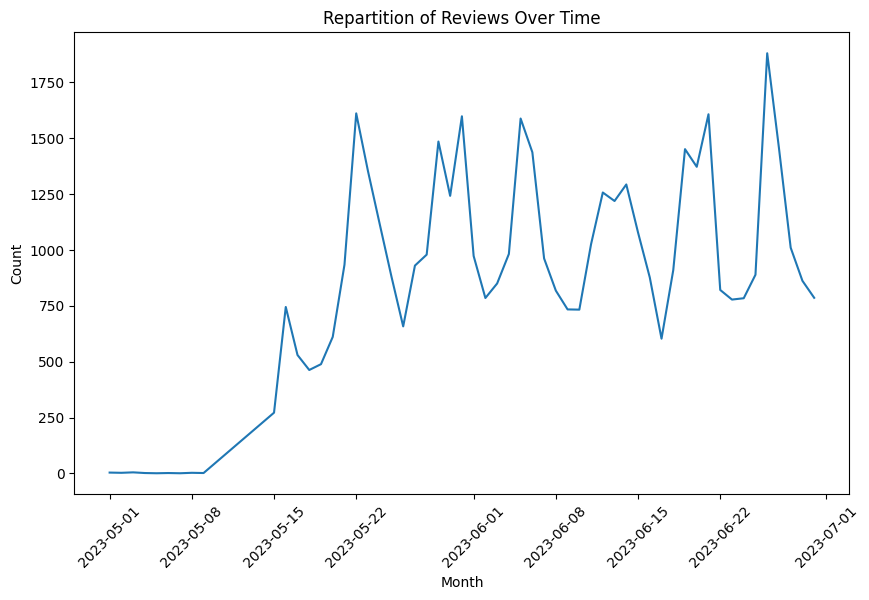

In [53]:
import matplotlib.pyplot as plt

# Convert the "Review created" column to datetime
df['Review created'] = pd.to_datetime(df['Review created'])

# Group the reviews by month and count the number of reviews in each month
daily_reviews = df.groupby(df['Review created'].dt.to_period('D')).size().reset_index(name='Count')

# Convert 'Review created' back to datetime
daily_reviews['Review created'] = daily_reviews['Review created'].dt.to_timestamp()

# Now plot
plt.figure(figsize=(10, 6))
plt.plot(daily_reviews['Review created'], daily_reviews['Count'])
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Repartition of Reviews Over Time')
plt.xticks(rotation=45)
plt.show()




In [55]:
daily_reviews.to_csv('daily_reviews.csv')

In [80]:
import pandas as pd
from transformers import pipeline, AutoTokenizer

# Créez une pipeline pour l'analyse de sentiment
nlp_fr = pipeline('sentiment-analysis', model='nlptown/bert-base-multilingual-uncased-sentiment')
nlp_en = pipeline('sentiment-analysis', model='nlptown/bert-base-multilingual-uncased-sentiment')

# Créez un tokenizer pour tronquer les textes
tokenizer = AutoTokenizer.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')

# Divisez le DataFrame en deux en fonction de la langue
df_fr = df[df['Language'] == 'fr']
df_en = df[df['Language'] == 'en']

# Appliquez l'analyse de sentiment à la colonne des avis
df_fr['sentiment'] = df_fr['Text'].apply(lambda review: nlp_fr([tokenizer.decode(tokenizer(review, truncation=True, max_length=510)['input_ids'])])[0]['label'])
df_en['sentiment'] = df_en['Text'].apply(lambda review: nlp_en([tokenizer.decode(tokenizer(review, truncation=True, max_length=400)['input_ids'])])[0]['label'])

# Recombinez les deux DataFrames en un seul
df = pd.concat([df_fr, df_en])
df

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
/var/folders/dj/drqjc_c134xgs5ns31syhsm40000gn/T/ipykernel_85149/1642987850.py:16: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/dj/drqjc_c134xgs5ns31syhsm40000gn/T/ipykernel_85149/1642987850.py:17: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a

,Hotel_Code,Review created,Hotel_Brand,Language,Text,Type of trip,Your gender identity,Your age group,sentiment,sentiment_score
6,6,2023-06-27,4,fr,"Nous avons séjourné deux nuits à Fontainebleau à l'hôtel de l'AIGLE NOIR en raison du festival de Jazz.\nL'hôtel est bien situé, non loin du château. Le forfait parking à 10 € par jour est appréciable durant le week-end.\nVotre réceptionniste a eu la gentillesse de nous surclasser et nous la remercions encore.\nLes petites attentions (bonbons, thé) sont agréables. Nous reviendrons séjourner l'année prochaine à l'hôtel durant le festival de JAZZ. Le rendez-vous est inscrit dans notre agenda !",couple,Female,NaN,5 stars,neutral
10,10,2023-06-26,0,fr,"Hôtel, bien situé, très propre, récent et bien tenu. \nUn moment agréable grace à personnel efficace et un aménagement bien pensé du RDC.\nMerci",business,Male,55-64,4 stars,neutral
12,12,2023-06-25,8,fr,Hôtel moderne et bien équipé. Très bon rapport qualité-prix. Très satisfait de la prestation.,single,Male,25-34,5 stars,neutral
22,17,2023-06-20,9,fr,Tout d'abord excellent accueil. \nServices au TOP. \nDe très bon conseils.\nInformations très intéressantes \nRéponse à toute nos questions \nHotel calme et reposant. \nExcellente Propreté dans la chambre et les parties communes. \nMerci à toute l'équipe de l'adagio St Cyprien. \nNous reviendrons sans soucis.,couple,Male,55-64,5 stars,positive
24,12,2023-06-20,8,fr,"Super accueil, hôtel moderne, buffet de déjeuner au top",friends,Female,35-54,5 stars,positive
...,...,...,...,...,...,...,...,...,...,...
47734,392,2023-05-22,10,en,The the service provided is considered minimal for a 4 stars hotel. There were no bathrobe no slippers in the room. When asked for a slipper for the bathroom i was informed the hotel ran out of them. There was no bottle of water in the room.,single,Female,35-54,NEGATIVE,negative
47735,389,2023-05-22,0,en,It will be better to have a kettle.\nThe hot water in bath is not stable: it turns hot and cold from time to time.,couple,Prefer not to answer,NaN,NEGATIVE,positive
47736,376,2023-05-22,8,en,Door doesn't work. It's locks you insider . Got it repaired 3 times .. you guys change the lock and then give faulty keys .. had this door issue 6 times during the stay and I was either waiting insider room or outsider room on multiple ocassion ..response of staff to resolve such issue is also not upto mark,business,Male,35-54,NEGATIVE,neutral
47737,387,2023-05-21,0,en,1 night. Comfy beds,family,Female,55-64,POSITIVE,neutral


In [ ]:
df_en['sentiment'] = df_en['Text'].apply(lambda review: nlp_en([tokenizer.decode(tokenizer(review, truncation=True, max_length=400)['input_ids'])])[0]['label'])

# Recombinez les deux DataFrames en un seul
df = pd.concat([df_fr, df_en])
df

In [ ]:
df.describe()

,Hotel_Code,Hotel_Brand
count,47741.000000,47741.000000
mean,1306.305733,7.022748
std,846.146640,6.491016
min,0.000000,0.000000
25%,527.000000,2.000000
50%,1288.000000,7.000000
75%,2028.000000,10.000000
max,3299.000000,37.000000


In [74]:
pd.set_option('display.max_colwidth', None)
df[['Text', 'sentiment_score']][:10]

,Text,sentiment_score
6,"Nous avons séjourné deux nuits à Fontainebleau à l'hôtel de l'AIGLE NOIR en raison du festival de Jazz.\nL'hôtel est bien situé, non loin du château. Le forfait parking à 10 € par jour est appréciable durant le week-end.\nVotre réceptionniste a eu la gentillesse de nous surclasser et nous la remercions encore.\nLes petites attentions (bonbons, thé) sont agréables. Nous reviendrons séjourner l'année prochaine à l'hôtel durant le festival de JAZZ. Le rendez-vous est inscrit dans notre agenda !",neutral
10,"Hôtel, bien situé, très propre, récent et bien tenu. \nUn moment agréable grace à personnel efficace et un aménagement bien pensé du RDC.\nMerci",neutral
12,Hôtel moderne et bien équipé. Très bon rapport qualité-prix. Très satisfait de la prestation.,neutral
22,Tout d'abord excellent accueil. \nServices au TOP. \nDe très bon conseils.\nInformations très intéressantes \nRéponse à toute nos questions \nHotel calme et reposant. \nExcellente Propreté dans la chambre et les parties communes. \nMerci à toute l'équipe de l'adagio St Cyprien. \nNous reviendrons sans soucis.,positive
24,"Super accueil, hôtel moderne, buffet de déjeuner au top",positive
27,Accueil chaleureux mais un peu gâché par la décoration abîmée qui mériterait d’être rafraîchie,neutral
28,"A 250€ les 2 nuits, je m'attendais à un autre standing d'hôtel\nHormis la tapisserie ""Style"", il n' y rien de stylé dans les chambres. \nCoins des murs abimés, salle abimée par l'humidité, oreillers de mauvaise qualité\nEt de plus, pas de prise électrique dans la salle de bain. \nCa sera mon dernier séjour dans cet hôtel.",neutral
29,"Tout est très bien , je trouve néanmoins curieux le site réception perdu au milieu du salon. Pas pratique pour le personnel et desorientant pour les clients.",neutral
32,"Le bureau d'accueil du responsable est véritablement étroit. Beaucoup de monde, il devait y avoir un séminaire, mais les chambres sont bien isolées.\nIl manque des petites bouteilles d'eau en chambre et un verre d'accueil que nous obtenons avec notre carte de fidélité",positive
37,"Hotel neuf, donc propre, bien isolé, et confortable\nSuper accueil",positive


In [85]:
df['sentiment'] = df['sentiment'].replace({'5 stars': 'POSITIVE', '4 stars': 'POSITIVE', '1 star': 'NEGATIVE', '2 stars': 'NEGATIVE', '3 stars': 'NEGATIVE'})
df


,Hotel_Code,Review created,Hotel_Brand,Language,Text,Type of trip,Your gender identity,Your age group,sentiment,sentiment_score
6,6,2023-06-27,4,fr,"Nous avons séjourné deux nuits à Fontainebleau à l'hôtel de l'AIGLE NOIR en raison du festival de Jazz.\nL'hôtel est bien situé, non loin du château. Le forfait parking à 10 € par jour est appréciable durant le week-end.\nVotre réceptionniste a eu la gentillesse de nous surclasser et nous la remercions encore.\nLes petites attentions (bonbons, thé) sont agréables. Nous reviendrons séjourner l'année prochaine à l'hôtel durant le festival de JAZZ. Le rendez-vous est inscrit dans notre agenda !",couple,Female,NaN,POSITIVE,neutral
10,10,2023-06-26,0,fr,"Hôtel, bien situé, très propre, récent et bien tenu. \nUn moment agréable grace à personnel efficace et un aménagement bien pensé du RDC.\nMerci",business,Male,55-64,POSITIVE,neutral
12,12,2023-06-25,8,fr,Hôtel moderne et bien équipé. Très bon rapport qualité-prix. Très satisfait de la prestation.,single,Male,25-34,POSITIVE,neutral
22,17,2023-06-20,9,fr,Tout d'abord excellent accueil. \nServices au TOP. \nDe très bon conseils.\nInformations très intéressantes \nRéponse à toute nos questions \nHotel calme et reposant. \nExcellente Propreté dans la chambre et les parties communes. \nMerci à toute l'équipe de l'adagio St Cyprien. \nNous reviendrons sans soucis.,couple,Male,55-64,POSITIVE,positive
24,12,2023-06-20,8,fr,"Super accueil, hôtel moderne, buffet de déjeuner au top",friends,Female,35-54,POSITIVE,positive
...,...,...,...,...,...,...,...,...,...,...
47734,392,2023-05-22,10,en,The the service provided is considered minimal for a 4 stars hotel. There were no bathrobe no slippers in the room. When asked for a slipper for the bathroom i was informed the hotel ran out of them. There was no bottle of water in the room.,single,Female,35-54,NEGATIVE,negative
47735,389,2023-05-22,0,en,It will be better to have a kettle.\nThe hot water in bath is not stable: it turns hot and cold from time to time.,couple,Prefer not to answer,NaN,NEGATIVE,positive
47736,376,2023-05-22,8,en,Door doesn't work. It's locks you insider . Got it repaired 3 times .. you guys change the lock and then give faulty keys .. had this door issue 6 times during the stay and I was either waiting insider room or outsider room on multiple ocassion ..response of staff to resolve such issue is also not upto mark,business,Male,35-54,NEGATIVE,neutral
47737,387,2023-05-21,0,en,1 night. Comfy beds,family,Female,55-64,POSITIVE,neutral


In [86]:
df['sentiment'].value_counts() /len(df) * 100


sentiment
POSITIVE    69.420414
NEGATIVE    30.579586
Name: count, dtype: float64

In [99]:
df.to_csv('reviews_sentiments.csv')

In [1]:
import pandas as pd 
df = pd.read_csv('reviews_sentiments.csv')

In [2]:
neg_df = df[df['sentiment'] == 'NEGATIVE']


In [3]:
neg_df_fr = neg_df[neg_df['Language'] == 'fr']
neg_df_fr.reset_index(drop=True, inplace=True)
neg_df_en = neg_df[neg_df['Language'] == 'en']
neg_df_en.reset_index(drop=True, inplace=True)

In [21]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

def preprocess_text_en(text):
    # Supprimer les caractères spéciaux et les chiffres
    text = re.sub(r'[^a-zA-Z]', ' ', text)
    
    # Convertir en minuscules
    text = text.lower()
    
    # Tokenization
    tokens = nltk.word_tokenize(text)
    
    # Supprimer les stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]
    
    # Lemmatisation
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    
    # Rejoindre les tokens en une seule chaîne de caractères
    preprocessed_text = ' '.join(tokens)
    
    return preprocessed_text

def preprocess_text_fr(text):
    # Supprimer les caractères spéciaux et les chiffres
    text = re.sub(r'[^a-zA-Z]', ' ', text)
    
    # Convertir en minuscules
    text = text.lower()
    
    # Tokenization
    tokens = nltk.word_tokenize(text)
    
    # Supprimer les stopwords
    stop_words = set(stopwords.words('french'))
    tokens = [token for token in tokens if token not in stop_words]
    
    # Lemmatisation
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    
    # Rejoindre les tokens en une seule chaîne de caractères
    preprocessed_text = ' '.join(tokens)
    
    return preprocessed_text
# Appliquer la fonction de prétraitement sur la colonne "Text" du dataframe
neg_df_en['Preprocessed_Text'] = neg_df_en['Text'].apply(preprocess_text_en)
neg_df_fr['Preprocessed_Text'] = neg_df_fr['Text'].apply(preprocess_text_fr)



In [22]:
neg_df_en.head()

,Unnamed: 0,Hotel_Code,Review created,Hotel_Brand,Language,Text,Type of trip,Your gender identity,Your age group,sentiment,sentiment_score,Preprocessed_Text
0,2,2,2023-06-30,0,en,There was no service at the bar on the ground ...,business,Male,65+,NEGATIVE,neutral,service bar ground floor staff untrained seem ...
1,3,3,2023-06-28,2,en,We stayed for the weekend. Arrived Saturday le...,couple,Female,35-54,NEGATIVE,negative,stayed weekend arrived saturday left sunday ro...
2,13,13,2023-06-25,4,en,"The hotel was lovely, big rooms, nice decor an...",family,Female,25-34,NEGATIVE,positive,hotel lovely big room nice decor comfortable b...
3,16,9,2023-06-22,7,en,Very disappointing. Stayed in King with terrac...,single,Female,55-64,NEGATIVE,positive,disappointing stayed king terrace garden wing ...
4,17,14,2023-06-22,8,en,"Overall is good, staffs in good manner and cle...",business,Female,25-34,NEGATIVE,positive,overall good staff good manner cleanliness als...


In [26]:
import pandas as pd

# Set the maximum width of a column to 100 characters
pd.set_option('display.max_colwidth', 1000)
neg_df_en[['Text', 'Preprocessed_Text']][:10]

,Text,Preprocessed_Text
0,There was no service at the bar on the ground floor. The staff is untrained and does not seem to be motivated enough,service bar ground floor staff untrained seem motivated enough
1,We stayed for the weekend. Arrived Saturday left Sunday. Room 509 with small balcony but perfectly centered with sunset. Shame cranes and buildings blocked it partially. Living doors blocked well excessive noise from the pool and restaurant terrace below. Bed was super comfy. Sofa bed was horrible as sofa. We were 2 and only used bed. Enough room for 2 and our big dog. Kitchenette without utensils so pretty much useless. We used the mini-fridge to keep drinks cool. No vending machine. So only option was room service or hotel restaurant. Parking was chaotic due to construction? Still looks like very little for amount of rooms. There is a gated parking garage underground. Breakfast was standard for 3 star hotel. Close to English breakfast (bacon scrambled eggs and beans). Understaffed in reception and in restaurant during morning service and check out. 15 euros charge per night for dog.,stayed weekend arrived saturday left sunday room small balcony perfectly centered sunset shame crane building blocked partially living door blocked well excessive noise pool restaurant terrace bed super comfy sofa bed horrible sofa used bed enough room big dog kitchenette without utensil pretty much useless used mini fridge keep drink cool vending machine option room service hotel restaurant parking chaotic due construction still look like little amount room gated parking garage underground breakfast standard star hotel close english breakfast bacon scrambled egg bean understaffed reception restaurant morning service check euro charge per night dog
2,"The hotel was lovely, big rooms, nice decor and comfortable bed. Love the design touches. Service was average - my son lost his new nike shoe as we were on the way to airport - it fell off as we got into the taxi. I called and asked for the team to collect (they confirmed that they found it) and for it to be post back to us which the lady agreed to, but havent received any response or indication that this has been actioned. can someone please contact me to confirm.",hotel lovely big room nice decor comfortable bed love design touch service average son lost new nike shoe way airport fell got taxi called asked team collect confirmed found post back u lady agreed havent received response indication actioned someone please contact confirm
3,"Very disappointing. Stayed in King with terrace in Garden Wing with my dog. I think it was supposed to be “deluxe”. Pretty ordinary if you ask me. And it was so hot it was like a sauna. I arrived at 8pm. Check in was from 3pm. Why did housekeeping not turn on AC in the room? Duty Manager argued with me about unusual heat in Ireland. It was the third week of high temperatures. Then she told me it was to cool down that night outside. I wasn’t sleeping outside! Brought me a “ventilator” which blew hot air around. Kept AC on all night. Next to useless. Dog and I sweated the whole night. Couldn’t open window as there were none - room had only doors and dog would have wandered off as “garden” was not secure. They also don’t turn AC on in the glass corridors linking garden wing to rest of hotel. So they, too, give you the whole sauna experience as well. Ridiculous. I had an early start and asked for breakfast to go. Very disappointing. Tiny croissant, hard fruit and a yoghurt. Had to a...",disappointing stayed king terrace garden wing dog think supposed deluxe pretty ordinary ask hot like sauna arrived pm check pm housekeeping turn ac room duty manager argued unusual heat ireland third week high temperature told cool night outside sleeping outside brought ventilator blew hot air around kept ac night next useless dog sweated whole night open window none room door dog would wandered garden secure also turn ac glass corridor linking garden wing rest hotel give whole sauna

In [28]:
import pandas as pd

# Concatenate the dataframes
neg_df = pd.concat([neg_df_en, neg_df_fr])

# Reset the index of the concatenated dataframe
neg_df = neg_df.reset_index(drop=True)
neg_df.to_csv('negative_reviews.csv')


In [35]:
neg_df

,Unnamed: 0,Hotel_Code,Review created,Hotel_Brand,Language,Text,Type of trip,Your gender identity,Your age group,sentiment,sentiment_score,Preprocessed_Text
0,2,2,2023-06-30,0,en,There was no service at the bar on the ground floor. The staff is untrained and does not seem to be motivated enough,business,Male,65+,NEGATIVE,neutral,service bar ground floor staff untrained seem motivated enough
1,3,3,2023-06-28,2,en,We stayed for the weekend. Arrived Saturday left Sunday. Room 509 with small balcony but perfectly centered with sunset. Shame cranes and buildings blocked it partially. Living doors blocked well excessive noise from the pool and restaurant terrace below. Bed was super comfy. Sofa bed was horrible as sofa. We were 2 and only used bed. Enough room for 2 and our big dog. Kitchenette without utensils so pretty much useless. We used the mini-fridge to keep drinks cool. No vending machine. So only option was room service or hotel restaurant. Parking was chaotic due to construction? Still looks like very little for amount of rooms. There is a gated parking garage underground. Breakfast was standard for 3 star hotel. Close to English breakfast (bacon scrambled eggs and beans). Understaffed in reception and in restaurant during morning service and check out. 15 euros charge per night for dog.,couple,Female,35-54,NEGATIVE,negative,stayed weekend arrived saturday left sunday room small balcony perfectly centered sunset shame crane building blocked partially living door blocked well excessive noise pool restaurant terrace bed super comfy sofa bed horrible sofa used bed enough room big dog kitchenette without utensil pretty much useless used mini fridge keep drink cool vending machine option room service hotel restaurant parking chaotic due construction still look like little amount room gated parking garage underground breakfast standard star hotel close english breakfast bacon scrambled egg bean understaffed reception restaurant morning service check euro charge per night dog
2,13,13,2023-06-25,4,en,"The hotel was lovely, big rooms, nice decor and comfortable bed. Love the design touches. Service was average - my son lost his new nike shoe as we were on the way to airport - it fell off as we got into the taxi. I called and asked for the team to collect (they confirmed that they found it) and for it to be post back to us which the lady agreed to, but havent received any response or indication that this has been actioned. can someone please contact me to confirm.",family,Female,25-34,NEGATIVE,positive,hotel lovely big room nice decor comfortable bed love design touch service average son lost new nike shoe way airport fell got taxi called asked team collect confirmed found post back u lady agreed havent received response indication actioned someone please contact confirm
3,16,9,2023-06-22,7,en,"Very disappointing. Stayed in King with terrace in Garden Wing with my dog. I think it was supposed to be “deluxe”. Pretty ordinary if you ask me. And it was so hot it was like a sauna. I arrived at 8pm. Check in was from 3pm. Why did housekeeping not turn on AC in the room? Duty Manager argued with me about unusual heat in Ireland. It was the third week of high temperatures. Then she told me it was to cool down that night outside. I wasn’t sleeping outside! Brought me a “ventilator” which blew hot air around. Kept AC on all night. Next to useless. Dog and I sweated the whole night. Couldn’t open window as there were none - room had only doors and dog would have wandered off as “garden” was not secure. They also don’t turn AC on in the glass corridors linking garden wing to rest of hotel. So they, too, give you the whole sauna experience as well. Ridiculous. I had an early start and asked for breakfast to go. Very disappointing. Tiny croissant, hard fruit and a yoghurt. Had to a...",single,Female,55-64,NEGATIVE,positive,disappointing stayed king terrace garden wing dog think supposed deluxe pretty ordinary ask hot like sauna arrived pm check

In [2]:
import pandas as pd
neg_df = pd.read_csv('negative_reviews.csv')

In [7]:
# Filtrer pour la marque 0
brand_0 = neg_df[neg_df['Hotel_Brand'] == 0]

# Obtenir la répartition des Hotel_Code
hotel_code_distribution = brand_0['Hotel_Code'].value_counts()

# Garder les 10 premiers Hotel_Code
top_10_hotel_codes = hotel_code_distribution[:10]

# Somme du reste
rest = hotel_code_distribution[10:].sum()

# Créer une nouvelle série pour le reste
rest_series = pd.Series([rest], index=['Rest'])

# Concaténer les deux séries
top_10_hotel_codes = pd.concat([top_10_hotel_codes, rest_series])

print(top_10_hotel_codes)

1252      68
807       61
36        44
1434      42
1537      37
1967      36
2206      35
95        32
2250      31
1641      30
Rest    3269
dtype: int64


In [14]:
# Filtrer pour la marque 0
brand_0 = neg_df[neg_df['Hotel_Brand'] == 0]

# Obtenir la répartition des Hotel_Code
hotel_code_distribution = brand_0['Hotel_Code'].value_counts()

# Garder les 10 premiers Hotel_Code
top_10_hotel_codes = hotel_code_distribution[:10]

# Somme du reste
rest = hotel_code_distribution[10:].sum()

# Créer une nouvelle série pour le reste
rest_series = pd.Series([rest], index=['Rest'])

# Concaténer les deux séries
top_10_hotel_codes = pd.concat([top_10_hotel_codes, rest_series])

top_10_hotel_codes.to_csv('top_10_hotel_codes_0.csv')
print(top_10_hotel_codes)

1252      68
807       61
36        44
1434      42
1537      37
1967      36
2206      35
95        32
2250      31
1641      30
Rest    3269
dtype: int64


In [19]:
neg_df[neg_df['Hotel_Brand'] == 2].shape[0]

1650

In [27]:
from bertopic import BERTopic
# Créez une instance de BERTopic
topic_model = BERTopic(language="english", calculate_probabilities=True)

# Entraînez BERTopic sur votre texte prétraité
topics, probs = topic_model.fit_transform(neg_df_en['Preprocessed_Text'])

# Obtenez les sujets
topic_sizes, topic_nums = topic_model.get_topic_info(); topic_sizes

KeyboardInterrupt: 